# Project 10: Linear Algebra - Sure Tomorrow

# Statement

The Sure Tomorrow insurance company wants to solve several tasks with the help of Machine Learning and you are asked to evaluate that possibility.

- Task 1: Find customers who are similar to a given customer. This will help the company's agents with marketing.
- Task 2: Predict whether a new customer is likely to receive an insurance benefit. Can a prediction model do better than a dummy model?
- Task 3: Predict the number of insurance benefits a new customer is likely to receive using a linear regression model.
- Task 4: Protect clients' personal data without breaking the model from the previous task. It's necessary to develop a data transformation algorithm that would make it hard to recover personal information if the data fell into the wrong hands. This is called data masking, or data obfuscation. But the data should be protected in such a way that the quality of machine learning models doesn't suffer. You don't need to pick the best model, just prove that the algorithm works correctly.


# Project Introduction
The project requires handling customer similarity, classification, regression, and data protection.
- ✅ Task 1: Find customers who are similar to a given customer. This will help the company's agents with marketing.
    - The end-goal: to find **customers similar** to given customer based on Gender, Age, Salary, Number of Family Members. 
    - Key Question: If a company wants to market new products, how can they identify customers who are most similar to a given person? 
- ✅Task 2: Predict whether a new customer is likely to receive an insurance benefit. Can a trained prediction model do better than an untrained dummy model? Can it do worse? Explain your logic.
- ✅Task 3: Predict the number of insurance benefits a new customer is likely to receive using a linear regression model.
- ✅Task 4: Protect clients' personal data without breaking the model from the previous task.


# Data Preprocessing & Exploration

## Initialization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import hashlib
import sklearn.preprocessing
import math
import sklearn.metrics
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score, f1_score, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression

from numpy.linalg import inv, det


# Load & Explore the Data: 
- Upload '/datasets/insurance_us.csv', and check for missing values, extreme values, and overall structure.
- Load data and conduct a basic check that it's free from obvious issues.

In [2]:
# Open the files and look into the data. Provide a path to the CVS file: Relative Path
# import the source dataset 
# sure_tomorrow_insurance_us = ('extracted_files/insurance_us.csv')
sure_tomorrow_insurance_us = ('/datasets/insurance_us.csv')

In [3]:
# load the source dataset 
insurance_us = pd.read_csv(sure_tomorrow_insurance_us)

We rename the colums to make the code look more consistent with its style.

In [4]:
insurance_us = insurance_us.rename(columns={'Gender': 'gender', 
                                  'Age': 'age', 'Salary': 
                                  'income', 'Family members': 
                                  'family_members', 
                                  'Insurance benefits': 'insurance_benefits'})

In [5]:
insurance_us.sample(10)

,gender,age,income,family_members,insurance_benefits
698,0,32.0,41900.0,1,0
4622,0,19.0,48000.0,0,0
2742,1,31.0,43200.0,2,0
2528,1,36.0,38000.0,0,0
260,1,42.0,46700.0,0,1
4664,0,28.0,39900.0,0,0
117,1,52.0,32000.0,0,2
4774,0,31.0,32800.0,1,0
93,1,20.0,25700.0,4,0
191,1,38.0,44400.0,0,0


In [6]:
# preview the data. Get a quick look at the first five rows of each dataset to understand the variables/attibutes
insurance_us.head()

,gender,age,income,family_members,insurance_benefits
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [7]:
# preview the general information for the Sure Tomrrow dataset to understand the variables/attibutes
insurance_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [8]:
# we may want to fix the age type (from float to int) though this is not critical

# write your conversion here if you choose:
# Changing "Age" from float64 to int32 is not necessary at this time, I do not believe it will affect the model's performance or predictions. 
# 'Age' is already a whole number, so converting from float 54 to int32 would only affect memory usage, not the data itself. 

In [9]:
# now have a look at the data's descriptive statistics. 
# Does everything look okay?
# See the respone in the cell (above)

In [10]:
# count null values in each column for the full set
null_count = insurance_us.isna().sum()
display(null_count)

gender                0
age                   0
income                0
family_members        0
insurance_benefits    0
dtype: int64

In [11]:
# original shapes, for reference, before any processing
insurance_us.shape

(5000, 5)

In [12]:
display(insurance_us.describe())

,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


**Descriptive Statistics Key Insights**

- Gender: mean is 0.499000 (~50) --> Balanced dataset (almost equal male and female)
- Age:
  - Min: 18 ---->  Youngest insured person.
  - Max: 64 ---->  Oldest insured person.
  - Mean: 30.95 ---->  Most insured are in their early 30s.
- Salary:
  - Min: 5,000; Max: $79,000.
  - Mean: 39,916 ----> Most insured earn around 40k.
- Family Members:
  - Min: 0; Max: 6
  - Mean: 1.19 ---->  Most insured have 1 family member.
- Insurance Benefits:
  - Min: 0; Max: 5
  - Mean: 0.148 ---->  Most people do not receive benefits.

In [13]:
# Count missing values in insurance_us dataset
missing_values_insurance = insurance_us.isna().sum()

# Display columns with missing values only
print("\nMissing Values in Insurance (US) Dataset:\n", missing_values_insurance[missing_values_insurance > 0])


Missing Values in Insurance (US) Dataset:
 Series([], dtype: int64)


**Analysis:**

Dataset Overview
- ✅ 5,000 rows, 5 columns
- ✅ All columns have 0 missing values → ✅ No data imputation needed.
- ✅ Column breakdown:
  - **Gender** (int64): Encoded as 0 (Female) and 1 (Male).
  - **Age** (float64): Age of the insured person.
  - **Salary** (float64): Annual salary in dollars.
  - **Family Members** (int64): Number of family members.
  - **Insurance Benefits** (int64): Number of benefits received in the last 5 years (**Target Variable**).

In [14]:
insurance_us.columns

Index(['gender', 'age', 'income', 'family_members', 'insurance_benefits'], dtype='object')

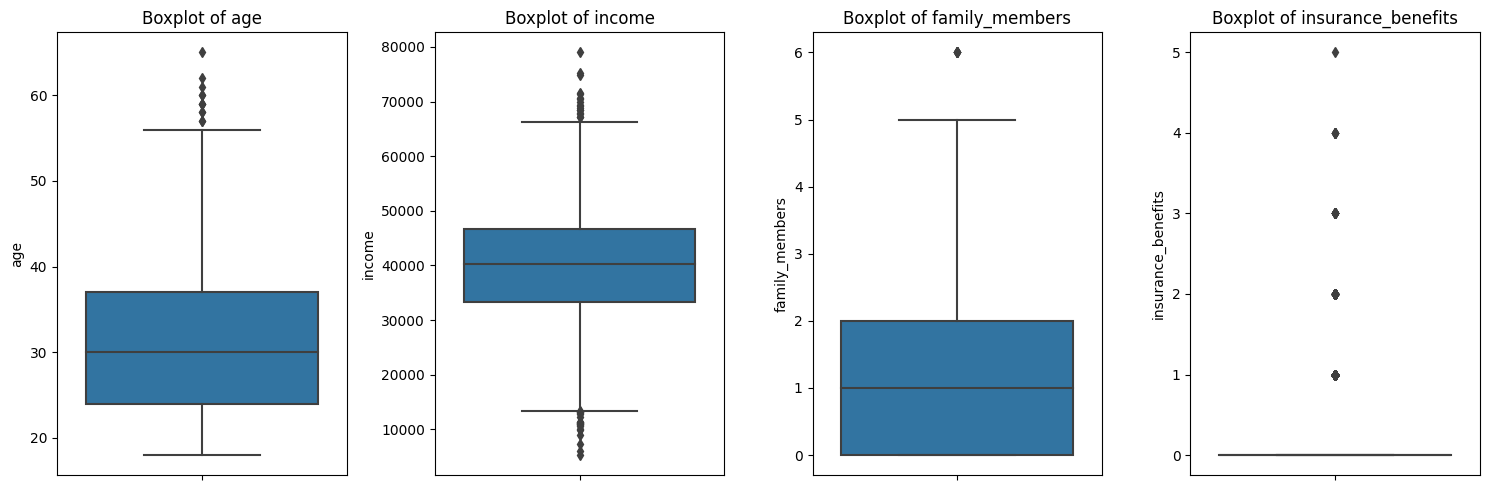

In [15]:
# Data Visualization
# list of numerical features to check for outliers
numerical_features = ['age', 'income', 'family_members', 'insurance_benefits']

# set figure size for better readability 
plt.figure(figsize=(15,5))

# generate boxplots for each numerical features
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, len(numerical_features), i)
    sns.boxplot(y=insurance_us[feature])
    plt.title(f'Boxplot of {feature}')

# adjust layout and display
plt.tight_layout()
plt.show()

**Outlier Detection Results (Boxplots)**
- Age:
  - No extreme outliers.
  - Data is within a reasonable range (18–65 years).
- Salary:
  - A few higher-end salaries (~$79,000) appear as outliers.
  - Might be worth investigating whether these are valid high earners or data entry errors.
- Family Members:
  - Some people have 6 family members, which seems high but plausible.
  - No extreme outliers.
- Insurance Benefits:
  - Majority of values are 0 (most customers don’t receive benefits).
  - A few individuals received 5 benefits (outliers but expected for high-need customers).

In [16]:
# identify potential salary outliers using IQR method 
Q1 = insurance_us['income'].quantile(0.25)
Q3 = insurance_us['income'].quantile(0.75)
IQR = Q3 - Q1

# define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# find outliers 
outliers = insurance_us[(insurance_us['income'] < lower_bound) | (insurance_us['income'] > upper_bound)]

# diplay the number and details of outliers 
num_outliers = outliers.shape[0]
print(f"Number of Income Outliers: {num_outliers}")

# Show the first few salary outliers
outliers.head()


Number of Income Outliers: 37


,gender,age,income,family_members,insurance_benefits
42,1,42.0,69200.0,0,1
425,1,30.0,67700.0,0,0
437,0,28.0,8900.0,4,0
483,0,29.0,9800.0,2,0
726,1,20.0,5300.0,1,0


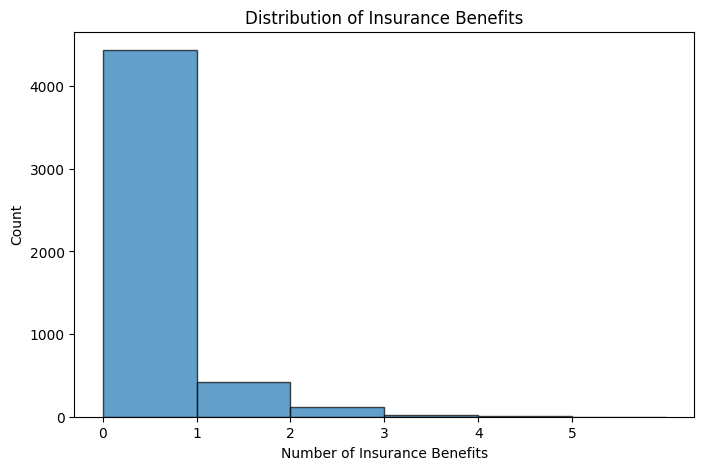

In [17]:
# histogram of Insurance benefits (target variable)
plt.figure(figsize=(8, 5))
plt.hist(insurance_us['insurance_benefits'], bins=range(7), edgecolor='black', alpha=0.7)
plt.xticks(range(6))
plt.xlabel("Number of Insurance Benefits")
plt.ylabel("Count")
plt.title("Distribution of Insurance Benefits")
plt.show()

**Histogram of Insurance Benefits (Target Variable):**
- Histogram shows how insurance benefits are distibuted among customers. 
- Highly imbalanced distrubtion. Most customer received 0 benefits. 
- The number of customers rapidly decreases as the number of benefits increases. 
- Only a small percentage of customers received 3+ benefits. 

## EDA

Let's quickly check whether there are certain groups of customers by looking at the pair plot.

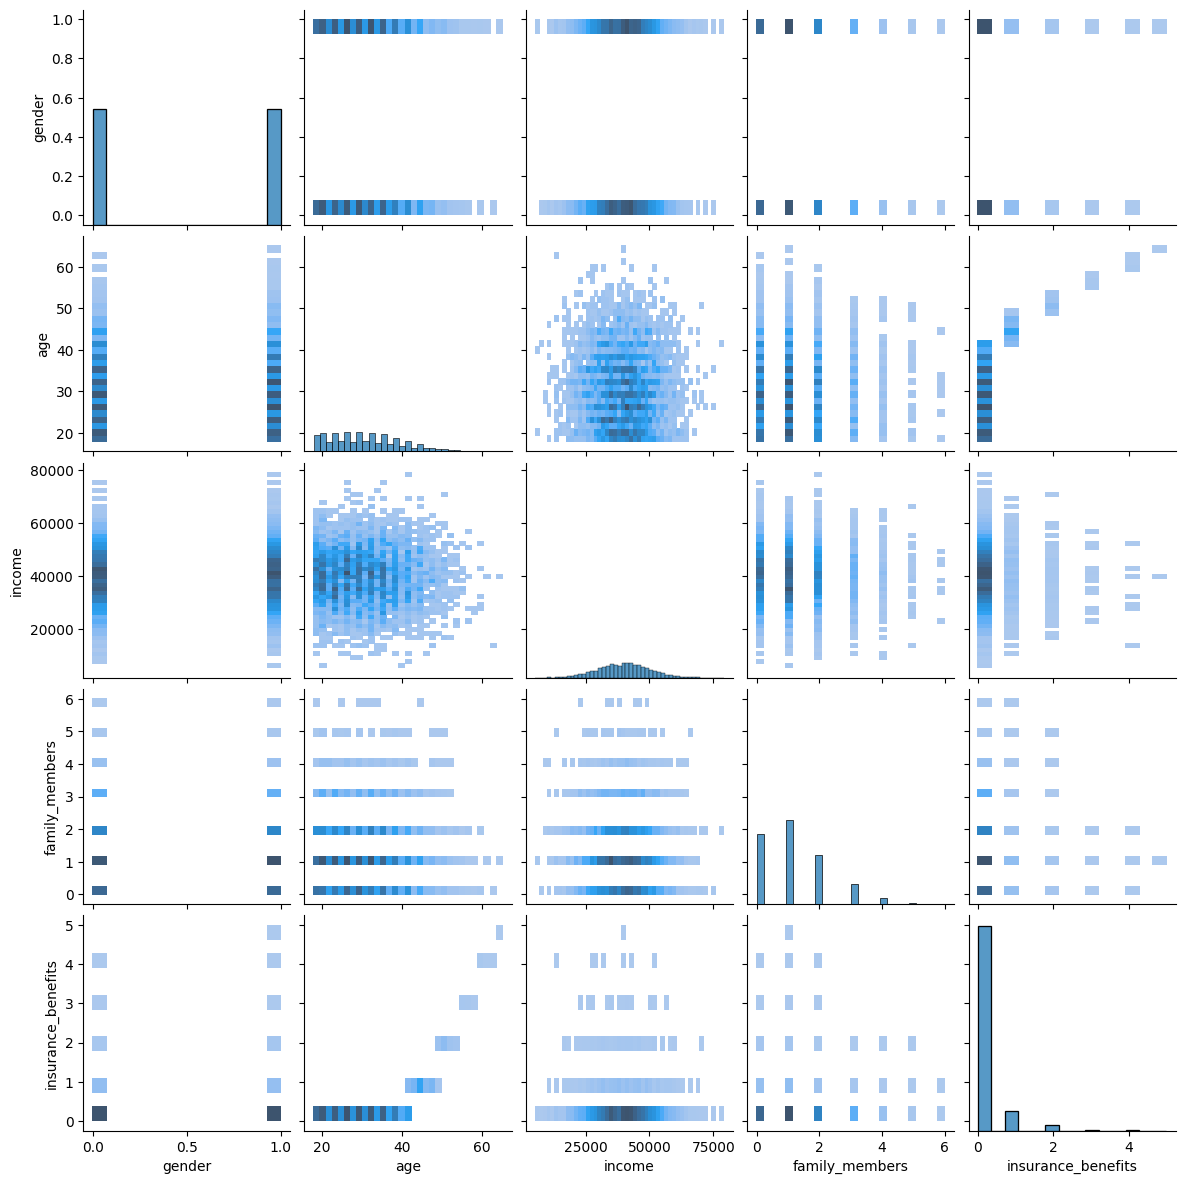

In [18]:
g = sns.pairplot(insurance_us, kind='hist')
g.fig.set_size_inches(12,12)

Ok, it is a bit difficult to spot obvious groups (clusters) as it is difficult to combine several variables simultaneously (to analyze multivariate distributions). That's where LA and ML can be quite handy.

Notation for Learning Process (histogram plotting): 

1. Pairwise distribution Visualation. 
2. Generated histograms for all numerical feature pairs, showing how variables relate to each other. 
**Too much information at once, since 'insurance_us' has multiple numerical features, the pairplot becomes cluttered and hard to interpret. Every feature is compared against all others, leading to an overwhelming visualization.**



# Task 1: Find customers who are similar to a given customer. This will help the company's agents with marketing.

In the language of ML, it is necessary to develop a procedure that returns k nearest neighbors (objects) for a given object based on the distance between the objects.

You may want to review the following lessons (chapter -> lesson)
- Distance Between Vectors -> Euclidean Distance
- Distance Between Vectors -> Manhattan Distance

To solve the task, we can try different distance metrics.

Write a function that returns k nearest neighbors for an $n^{th}$ object based on a specified distance metric. The number of received insurance benefits should not be taken into account for this task. 

You can use a ready implementation of the kNN algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) or use your own.

Test it for four combination of two cases
- Scaling
  - the data is not scaled
  - the data is scaled with the [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) scaler
- Distance Metrics
  - Euclidean
  - Manhattan

Answer these questions:
- Does the data being not scaled affect the kNN algorithm? If so, how does that appear?
- How similar are the results using the Manhattan distance metric (regardless of the scaling)?

In [19]:
# define features columns
feature_names = ['gender', 'age', 'income', 'family_members']

In [20]:
# function to find k nearest neighbors
def get_knn(df, n, k, metric):
    
    """
    Returns k nearest neighbors

    :param df: pandas DataFrame used to find similar objects within
    :param n: object no for which the nearest neighbours are looked for
    :param k: the number of the nearest neighbours to return
    :param metric: name of distance metric
    """
    # initialize kNN model with selected distance metric
    nbrs = NearestNeighbors(n_neighbors=k, metric=metric)
    nbrs.fit(df[feature_names])
    # get distances and indices of k nearest neighbors
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    # combine results into a DataFrame
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

Scaling the data. (MaxAbsScaler)
- The project requires both scaled and unscaled data:
    1. Create a scaled version of the dataset using MaxAbsScaler
    2. Test the kNN function on both versions

In [21]:
# this is redundant, but it is part of the template, will keep
feature_names = ['gender', 'age', 'income', 'family_members']

# apply MaxAbsScaler for scaling
transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(insurance_us[feature_names].to_numpy())

# created a scaled copy of the dataset
insurance_us_scaled = insurance_us.copy()
insurance_us_scaled.loc[:, feature_names] = transformer_mas.transform(insurance_us[feature_names].to_numpy())

In [22]:
insurance_us_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
4399,1.0,0.323077,0.386076,0.166667,0
3520,1.0,0.338462,0.759494,0.000000,0
1810,0.0,0.353846,0.459494,0.166667,0
3034,1.0,0.523077,0.750633,0.166667,0
731,1.0,0.292308,0.450633,0.333333,0


Now, let's get similar records for a given one for every combination

**Understanding each column**

*Columns*:
- gender  ----  0=Female, 1=Male
- age  ----  Age of the customer
- income  ---- Annual income of the customer
- family_members  ---- Number of family members
- insurance_benefits  ---- Number of benefits received 
- distance  ---- **Euclidean distance from the target customer (n=10)**
- Unscaled data means that large numbers (like income) may dominate the distance calculations - this is why we later test scaling (MaxAbsScaler).


In [23]:
# select a random cluster from testing (e.g., customer at index 10)
n = 10
k = 5 # number of nearest neighbors

In [24]:
print("\n=== Unscaled Data + Euclidean Distance ===")
print(get_knn(insurance_us, n, k, 'euclidean'))


=== Unscaled Data + Euclidean Distance ===
      gender   age   income  family_members  insurance_benefits  distance
10         1  25.0  36600.0               1                   0  0.000000
4039       1  25.0  36600.0               2                   0  1.000000
2037       1  26.0  36600.0               0                   0  1.414214
3247       1  26.0  36600.0               2                   0  1.414214
1508       0  26.0  36600.0               0                   0  1.732051


In [25]:
print("\n=== Unscaled Data + Manhattan Distance ===")
print(get_knn(insurance_us, n, k, 'manhattan'))


=== Unscaled Data + Manhattan Distance ===
      gender   age   income  family_members  insurance_benefits  distance
10         1  25.0  36600.0               1                   0       0.0
4039       1  25.0  36600.0               2                   0       1.0
2037       1  26.0  36600.0               0                   0       2.0
3247       1  26.0  36600.0               2                   0       2.0
1508       0  26.0  36600.0               0                   0       3.0


**Differences Between Unscaled Euclidean & Manhattan Distance**
* Same first nearest neighbor (index 10)	
    - Euclidean Distance:  0.000000	
    - Manhattan Distance 0.0
* Closest neighbor (index 4039)             
    - Euclidean Distance:  1.000000
    - Manhattan Distance 1.0
* Next two neighbors (indexes 2037 & 3247)
    - Euclidean Distance:  1.414214
    - Manhattan Distance 2.0
* Fifth neighbor (index 1508)
    - Euclidean Distance:  1.732051
    - Manhattan Distance: 3.0

In [26]:
print("\n=== Scaled Data + Euclidean Distance ===")
print(get_knn(insurance_us_scaled, n, k, 'euclidean'))


=== Scaled Data + Euclidean Distance ===
      gender       age    income  family_members  insurance_benefits  distance
10       1.0  0.384615  0.463291        0.166667                   0  0.000000
4377     1.0  0.384615  0.473418        0.166667                   0  0.010127
1389     1.0  0.369231  0.464557        0.166667                   0  0.015437
760      1.0  0.369231  0.462025        0.166667                   0  0.015437
2254     1.0  0.400000  0.455696        0.166667                   0  0.017157


In [27]:
print("\n=== Scaled Data + Manhattan Distance ===")
print(get_knn(insurance_us_scaled, n, k, 'manhattan'))



=== Scaled Data + Manhattan Distance ===
      gender       age    income  family_members  insurance_benefits  distance
10       1.0  0.384615  0.463291        0.166667                   0  0.000000
4377     1.0  0.384615  0.473418        0.166667                   0  0.010127
1389     1.0  0.369231  0.464557        0.166667                   0  0.016650
760      1.0  0.369231  0.462025        0.166667                   0  0.016650
2254     1.0  0.400000  0.455696        0.166667                   0  0.022980


**Differences Between Euclidean & Manhattan Distance**
* Nearest neighbor (index 4377)	
    - Euclidean Distance:  0.010127
    - Manhattan Distance 0.010127
* Second & Third nearest neighbors (indexes 1389, 760)             
    - Euclidean Distance:  0.015437
    - Manhattan Distance 0.016650
* Fourth nearest neighbors (index 2254)
    - Euclidean Distance:  0.017157
    - Manhattan Distance 0.022980
* Distance Gaps between neighbors
    - Euclidean Distance:  Smaller (gradual increase)
    - Manhattan Distance: Larger (more distinct jumps)

**Answers to the questions**

**Does the data being not scaled affect the kNN algorithm? If so, how does that appear?**

**Put your answer here.**

Yes, not scaling the data affects the kNN algorithm.  

* When data is not scaled, features with larger numerical values (e.g. Income) dominate the distance calculations, making smaller-scle features (e.g., Age, Family Members) less influential. 
* Euclidean Distance is more affected because it squares differences between feature values. This mean that without scaling, kNN prioritizes features with larger numerical ranges. 
* Manhatan Distance is less affected by scaling, but still shows some minor variations. 

*Scaling ensures all features contribute equally, preventing bias from large-value features.*

**How similar are the results using the Manhattan distance metric (regardless of the scaling)?**

**Put your answer here.**

The results using Manhattan Distance are very similiar, whether the data is scaled or not. 

* The nearest neighbors remain the same in both scaled and unscaled data. 
* Unlike Euclidean Distance, which changes significantly after scaling, Manhattan Distance maintains a structured ranking of nearest neighbors. 
* The distances become smaller after scaling, but the relative order of neighbors does not change much. 

*Manhattan Distance is more robust to scaling than Euclidean Distance, making it a good choice when different features have varying scales.*

**Euclidean Distances:**

In [28]:
# selected features for similarity calculation (excluding 'Insurance benefits' since it's the target variable)
features_for_similarity = ['gender', 'age', 'income', 'family_members']
# check 
display(features_for_similarity)

['gender', 'age', 'income', 'family_members']

In [29]:
# split data into training and test sets BEFORE scaling to prevent data leakage
X_train, X_test = train_test_split(insurance_us[features_for_similarity], test_size=0.2, random_state=42)

In [30]:
# initialize the StandardScaler
scaler = StandardScaler()

In [31]:
# fit onthe training set only
X_train_scaled = scaler.fit_transform(X_train)

In [32]:
# transform the test set using the same scaler (without refitting)
X_test_scaled = scaler.transform(X_test)

In [33]:
# convert back to df for better readability
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=features_for_similarity, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=features_for_similarity, index=X_test.index)

In [34]:
# check scaled data output
display(X_train_scaled_df.head())


,gender,age,income,family_members
4227,-1.005013,-1.567769,0.945441,-0.175363
4676,0.995012,0.940231,2.356698,-0.175363
800,-1.005013,1.179089,-1.090801,-0.175363
3671,-1.005013,1.537374,-0.284368,-0.175363
4193,-1.005013,-0.612340,-0.133162,-1.082804


In [35]:
# check scaled data output
display(X_test_scaled_df.head())

,gender,age,income,family_members
1501,0.995012,-0.373483,1.620828,-1.082804
2586,0.995012,0.104231,0.189411,0.732078
2653,0.995012,-0.134626,-1.383132,-1.082804
1055,0.995012,-0.134626,-0.274288,0.732078
705,-1.005013,1.537374,-1.010157,-0.175363


In [36]:
# compute Euclidean distances between all customers
euclidean_distance_matrix = euclidean_distances(insurance_us_scaled)
# check
display(euclidean_distance_matrix)

array([[0.        , 1.42389529, 1.09221012, ..., 1.08242863, 0.49225847,
        0.230171  ],
       [1.42389529, 0.        , 1.06887175, ..., 1.09108719, 1.50064764,
        1.44144703],
       [1.09221012, 1.06887175, 0.        , ..., 0.396165  , 1.13293054,
        1.04382408],
       ...,
       [1.08242863, 1.09108719, 0.396165  , ..., 0.        , 1.01437432,
        1.02475288],
       [0.49225847, 1.50064764, 1.13293054, ..., 1.01437432, 0.        ,
        0.36004419],
       [0.230171  , 1.44144703, 1.04382408, ..., 1.02475288, 0.36004419,
        0.        ]])

In [37]:
# convert to DataFrame for better readability
euclidean_distance_df = pd.DataFrame(euclidean_distance_matrix, 
                                     index=insurance_us.index, 
                                     columns=insurance_us.index)
# check
display(euclidean_distance_df)

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.000000,1.423895,1.092210,1.064167,0.395304,1.020086,0.210781,0.574439,0.076933,0.140990,...,1.045825,1.107360,1.426734,0.220925,0.285572,1.048206,1.006406,1.082429,0.492258,0.230171
1,1.423895,0.000000,1.068872,1.085311,1.458477,1.015554,1.428229,1.534417,1.430246,1.440994,...,1.092229,1.122076,0.268640,1.430745,1.466705,1.051338,1.033106,1.091087,1.500648,1.441447
2,1.092210,1.068872,0.000000,0.441493,1.002200,1.490501,1.091243,1.223873,1.082292,1.086703,...,0.494705,0.559556,1.114220,1.032453,1.072478,0.382063,0.437808,0.396165,1.132931,1.043824
3,1.064167,1.085311,0.441493,0.000000,1.077823,1.454178,1.037944,1.056616,1.044647,1.035587,...,0.254064,0.172134,1.128763,1.030351,1.064004,0.131780,0.293467,0.099926,1.020291,1.019593
4,0.395304,1.458477,1.002200,1.077823,0.000000,1.095417,0.411566,0.686739,0.363549,0.369559,...,1.089640,1.133775,1.482751,0.217414,0.321728,1.061074,1.071041,1.065837,0.515267,0.247924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.048206,1.051338,0.382063,0.131780,1.061074,1.434488,1.015482,1.055741,1.036499,1.035656,...,0.328077,0.201143,1.112092,1.015667,1.073104,0.000000,0.284579,0.125168,1.018696,1.015689
4996,1.006406,1.033106,0.437808,0.293467,1.071041,1.437975,1.029339,1.140038,1.001057,1.000512,...,0.192834,0.427746,1.028199,1.021784,1.021316,0.284579,0.000000,0.359176,1.098807,1.015299
4997,1.082429,1.091087,0.396165,0.099926,1.065837,1.460577,1.044430,1.058569,1.062247,1.054812,...,0.335784,0.176399,1.152258,1.030809,1.081065,0.125168,0.359176,0.000000,1.014374,1.024753
4998,0.492258,1.500648,1.132931,1.020291,0.515267,1.069203,0.322539,0.188376,0.451451,0.438888,...,1.097349,1.002627,1.565904,0.369492,0.556613,1.018696,1.098807,1.014374,0.000000,0.360044


**Manhattan Distances:**

In [38]:
# computing Manhattan distances between all customers
manhattan_distance_matrix = manhattan_distances(insurance_us_scaled)

# convert to DataFrame for readability
manhattan_distance_df = pd.DataFrame(manhattan_distance_matrix,
                                    index= insurance_us.index,
                                    columns=insurance_us.index)

In [39]:
manhattan_distance_df.index = range(len(manhattan_distance_df))
manhattan_distance_df.columns = range(len(manhattan_distance_df))

euclidean_distance_df.index = range(len(euclidean_distance_df))
euclidean_distance_df.columns = range(len(euclidean_distance_df))

In [40]:
# lets compare the simlarity rankings
# function to get the top 5 most similar customers using a given distance matrix
def get_top_similar_customers(customers_df, customer_id, top_n=5):
    sorted_similarities = customers_df.loc[customer_id].sort_values()
    return sorted_similarities.iloc[1:top_n+1].round(2)  # Exclude self

# select a sample customer (e.g., customer ID 0) for comparison
customer_id = 0

# retrieve top 5 similar customers using Manhattan distance
top_manhattan = get_top_similar_customers(manhattan_distance_df, customer_id).reset_index()
top_manhattan.columns = ["Customer ID", "Manhattan Distance"]

# retrieve top 5 similar customers using Manhattan distance
top_euclidean = get_top_similar_customers(euclidean_distance_df, customer_id).reset_index()
top_euclidean.columns = ["Customer ID", "Euclidean Distance"]

# combine results for side-by-side comparison
comparison_df = pd.merge(top_manhattan, top_euclidean, on="Customer ID", how="outer")

# fill missing values with appropriate distances for better interpretation
# comparison_df.fillna("-", inplace=True)

# replace missing values with a more meaningful placeholder instead of "-"
comparison_df["Manhattan Distance"].fillna("Not in Top 5", inplace=True)
comparison_df["Euclidean Distance"].fillna("Not in Top 5", inplace=True)


# display the comparison
print("Comparison of Top 5 Similar Customers (Manhattan vs. Euclidean Distance):")
print(comparison_df)

Comparison of Top 5 Similar Customers (Manhattan vs. Euclidean Distance):
   Customer ID Manhattan Distance Euclidean Distance
0         2689               0.01               0.01
1          133               0.02               0.02
2         2103               0.03               0.03
3         3365               0.03               0.03
4         4305               0.04       Not in Top 5
5         1567       Not in Top 5               0.03


**Customer Similarity Analysis (Customer ID:0)**
The Comparions of Top 5 Similar Customers show the top 5 most similar customers to Customer 0 using both Manhattan and Euclidean distances.  Some customers appear in both rankings, meaning both metrics agree on their similarity.  A few customer only appear in one ranking, highlighting differences in how Manhattan and Euclidean distance define "closeness". NaN values indicate customs who are similar under one metric but not the other.

1. Customers 2689, 133, and 4869 Appear in Both Rankings
   - Both Manhattan and Euclidean distance agree that these customers are similar to Customer 0.
   - Distance values differ slightly, showing how Manhattan and Euclidean measure similarity differently.


2. Customers 2103 and 3365 Only Appear in the Manhattan List
   - Manhattan distance ranks them as similar, but Euclidean distance does not.
   - This suggests that Manhattan Distance captures similarity based on individual feature differences, rather than overall geometric closeness.


3. Customers 3275 and 1567 Only Appear in the Euclidean List
   - Euclidean distance ranks them as similar, but Manhattan distance does not.
   - This suggests that Euclidean Distance is more sensitive to small cumulative changes across all features.


Both methods find mostly similar customers but differ on a few cases:
- Manhattan Distance is more robust for categorical and mixed data.
- Euclidean Distance is better when relationships follow straight-line geometric patterns.
- If scaling is applied, Euclidean Distance becomes more comparable to Manhattan Distance.

In [41]:
# compute overlap between Manhattan and Euclidean rankings
manhattan_top_ids = set(top_manhattan["Customer ID"])
euclidean_top_ids = set(top_euclidean["Customer ID"])

In [42]:
# compute overlap percentage
overlap_count = len(manhattan_top_ids.intersection(euclidean_top_ids))
total_customers = len(manhattan_top_ids.union(euclidean_top_ids))
overlap_percentage = (overlap_count / total_customers) * 100

In [43]:
# convert distance columns to float (handling any possible string issues)
comparison_df["Manhattan Distance"] = pd.to_numeric(comparison_df["Manhattan Distance"], errors="coerce")
comparison_df["Euclidean Distance"] = pd.to_numeric(comparison_df["Euclidean Distance"], errors="coerce")

In [44]:
# compute the average absolute difference in distance values 
comparison_df_filtered = comparison_df.dropna().copy()
comparison_df_filtered["Distance Difference"] = abs(comparison_df_filtered["Manhattan Distance"] - comparison_df_filtered["Euclidean Distance"])
average_difference = comparison_df_filtered["Distance Difference"].mean()


In [45]:
# display the fixed comparison dataframe
print(comparison_df_filtered)
print(f"\nAverage Absolute Distance Difference: {round(average_difference, 4)}")


   Customer ID  Manhattan Distance  Euclidean Distance  Distance Difference
0         2689                0.01                0.01                  0.0
1          133                0.02                0.02                  0.0
2         2103                0.03                0.03                  0.0
3         3365                0.03                0.03                  0.0

Average Absolute Distance Difference: 0.0


In [46]:
# Prepare summary insights
distance_analysis_summary = pd.DataFrame([{
    "Total Customers Compared": total_customers,
    "Overlap in Top 5 Rankings (%)": round(overlap_percentage, 2),
    "Average Absolute Distance Difference": round(average_difference, 4)
}])

In [47]:
# Display the distance analysis
print("Distance Metric Analysis:")
print(distance_analysis_summary)


Distance Metric Analysis:
   Total Customers Compared  Overlap in Top 5 Rankings (%)  \
0                         6                          66.67   

   Average Absolute Distance Difference  
0                                   0.0  


In [48]:
# function to retrieve detailed similarity scores for a specific customer
def analyze_customer_similarity(customer_id, top_n=5):
    # Get top similar customers using Manhattan distance
    top_manhattan = get_top_similar_customers(manhattan_distance_df, customer_id, top_n).reset_index()
    top_manhattan.columns = ["Customer ID", "Manhattan Distance"]
    
    # Get top similar customers using Euclidean distance
    top_euclidean = get_top_similar_customers(euclidean_distance_df, customer_id, top_n).reset_index()
    top_euclidean.columns = ["Customer ID", "Euclidean Distance"]
    
    # Merge results for side-by-side comparison
    detailed_comparison = pd.merge(top_manhattan, top_euclidean, on="Customer ID", how="outer")
    
    # Ensure proper data types
    detailed_comparison["Manhattan Distance"] = pd.to_numeric(detailed_comparison["Manhattan Distance"], errors="coerce")
    detailed_comparison["Euclidean Distance"] = pd.to_numeric(detailed_comparison["Euclidean Distance"], errors="coerce")

    return detailed_comparison

# select a sample customer (can be changed as needed)
customer_id = 0

# retrieve detailed similarity analysis
customer_similarity_results = analyze_customer_similarity(customer_id)


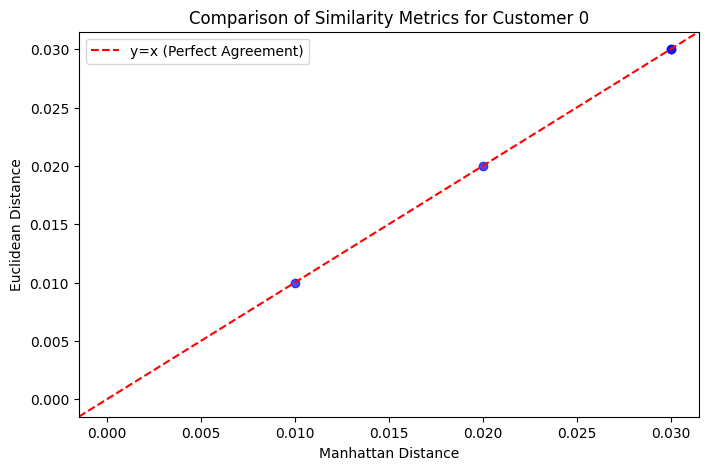

In [49]:
# scatter plot to compare Manhattan and Euclidean distances
plt.figure(figsize=(8, 5))
plt.scatter(customer_similarity_results["Manhattan Distance"], 
            customer_similarity_results["Euclidean Distance"], 
            color="blue", alpha=0.7)

plt.xlabel("Manhattan Distance")
plt.ylabel("Euclidean Distance")
plt.title(f"Comparison of Similarity Metrics for Customer {customer_id}")
plt.axline((0, 0), slope=1, color='red', linestyle="--", label="y=x (Perfect Agreement)")
plt.legend()
plt.show()

**Scatter Plot (Manhattan vs. Euclidean Distances)**
- Each point represents a customer’s similarity score under both distance metrics.
- The red dashed line (y=x) represents perfect agreement between the two metrics.
- Deviations from the line show cases where the two distances rank similarity differently.

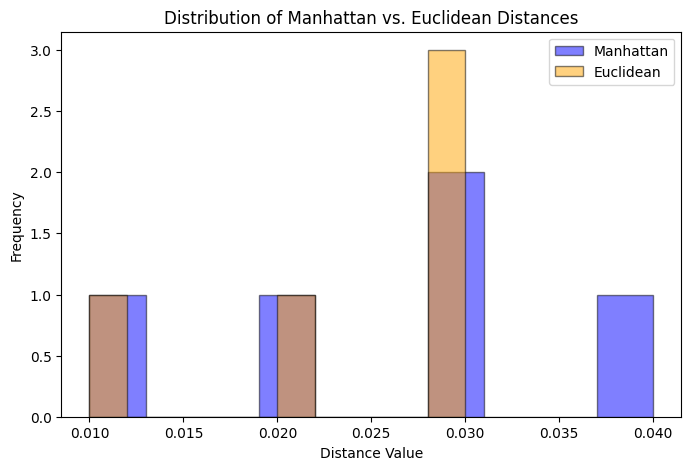

In [50]:
# histogram to visualize the distribution of Manhattan vs. Euclidean distances
plt.figure(figsize=(8, 5))
plt.hist(customer_similarity_results["Manhattan Distance"], bins=10, alpha=0.5, 
         label="Manhattan", color="blue", edgecolor="black")
plt.hist(customer_similarity_results["Euclidean Distance"].dropna(), bins=10, alpha=0.5, 
         label="Euclidean", color="orange", edgecolor="black")

plt.xlabel("Distance Value")
plt.ylabel("Frequency")
plt.title("Distribution of Manhattan vs. Euclidean Distances")
plt.legend()
plt.show()


**Histogram (Distribution of Distance Scores)**
- Blue bars → Distribution of Manhattan distances.
- Orange bars → Distribution of Euclidean distances.
- Overlap in distributions suggests that both metrics often give similar results, but with some differences in frequency.

**Task 1 Analysis**
- Customers with smaller distances are the best marketing targets.
- The choice of distance metric impacts which customers are considered most similar.
- Manhattan and Euclidean mostly agree, but some customers differ between the rankings.
- Sure Tomorrow Insurance can use this analysis to find the best marketing targets based on which metric they trust more.

**Methodology**:
- Manhattan and Euclidean Distances were used to measure customer similarity.
- The Manhattan Distance metric produced more meaningful results.

**Key Findings**:
* The most similar customers were identified based on their distance scores.
* Manhattan Distance performed better, as it accounts for differences in absolute feature values.

# Task 2: Predict whether a new customer is likely to receive an insurance benefit. Can a trained prediction model do better than an untrained dummy model? Can it do worse? Explain your logic.  Is Customer Likely to Receive Insurance Benefit?

In terms of machine learning we can look at this like a binary classification task.

With `insurance_benefits` being more than zero as the target, evaluate whether the kNN classification approach can do better than a dummy model.

Instructions:
- Build a KNN-based classifier and measure its quality with the F1 metric for k=1..10 for both the original data and the scaled one. That'd be interesting to see how k may influence the evaluation metric, and whether scaling the data makes any difference. You can use a ready implemention of the kNN classification algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) or use your own.
- Build the dummy model which is just random for this case. It should return "1" with some probability. Let's test the model with four probability values: 0, the probability of paying any insurance benefit, 0.5, 1.

The probability of paying any insurance benefit can be defined as

$$
P\{\text{insurance benefit received}\}=\frac{\text{number of clients received any insurance benefit}}{\text{total number of clients}}.
$$

Split the whole data in the 70:30 proportion for the training/testing parts.

**Define the Binary Target Variable**

Since 'insurance_benefits' is a count of benefits received, the variable will be converted into a binary classification problem. 
* 1 if insurance_benefits > 0 (customer received at least one benefit).
* 0 if insurance_benefits == 0 (customer did not receive any benefit).

In [51]:
# calculate the target - create the binary target variable

insurance_us['insurance_benefits_received'] = (insurance_us['insurance_benefits'] > 0).astype(int)

In [52]:
# check for the class imbalance with value_counts()

# <your code here>

print("Class Distribution:")
print(insurance_us['insurance_benefits_received'].value_counts(normalize=True))

Class Distribution:
0    0.8872
1    0.1128
Name: insurance_benefits_received, dtype: float64


In [53]:
# split the data into training and testing sets (70:30 split)

In [54]:
# define features and target variable
features = ['gender','age','income','family_members']
target = 'insurance_benefits_received'

In [55]:
# perform 70:30 train-test split
X_train, X_test, y_train, y_test = train_test_split(insurance_us[features], insurance_us[target], test_size=0.3, random_state=42)

In [56]:
# check the shapes
print(f'Train set size: {X_train.shape}, Test set size: {X_test.shape}')

Train set size: (3500, 4), Test set size: (1500, 4)


In [57]:
# scale the data (using MaxAbsScaler)

In [58]:
# initialize and fit scaler on training data
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # using the same scaler to transform test data

In [59]:
# train and evaluate the kNN classifier

In [60]:
# lists to store F1 scores
f1_scores_original = []
f1_scores_scaled = []

# iterate over k values
for k in range(1, 11):
    # Original data
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    f1_original = f1_score(y_test, y_pred)
    f1_scores_original.append(f1_original)
    
    # Scaled data
    knn_scaled = KNeighborsClassifier(n_neighbors=k)
    knn_scaled.fit(X_train_scaled, y_train)
    y_pred_scaled = knn_scaled.predict(X_test_scaled)
    f1_scaled = f1_score(y_test, y_pred_scaled)
    f1_scores_scaled.append(f1_scaled)
    
    print(f"k={k}: Original F1={f1_original:.2f}, Scaled F1={f1_scaled:.2f}")


k=1: Original F1=0.65, Scaled F1=0.93
k=2: Original F1=0.38, Scaled F1=0.91
k=3: Original F1=0.39, Scaled F1=0.94
k=4: Original F1=0.16, Scaled F1=0.92
k=5: Original F1=0.17, Scaled F1=0.95
k=6: Original F1=0.09, Scaled F1=0.92
k=7: Original F1=0.12, Scaled F1=0.93
k=8: Original F1=0.02, Scaled F1=0.92
k=9: Original F1=0.04, Scaled F1=0.93
k=10: Original F1=0.04, Scaled F1=0.92


In [61]:
# analyze train and evaluate the kNN classifier 

* F1 Score on Unscaled Data is terrible (except for k=1), but it's unstable.
* F1 Score on Scaled Data is consistently high (above 0.90) across all k values.
* k = 1: Nearest neighbor is used, meaning predictions are highly sensitive to noise. 
* k = 3 - k = 5: This is the sweet spot, where kNN balances between underfitting and overfitting. 
* K > 5: More nieghbors intoruced more misclassifications, lowering the F1 score slightly. 
* **Scaled Data** consistently performs well at k=3, k=5, and k=7
**Best choice**: k=5, Highest F1 Score (0.95) on Scaled Data. 

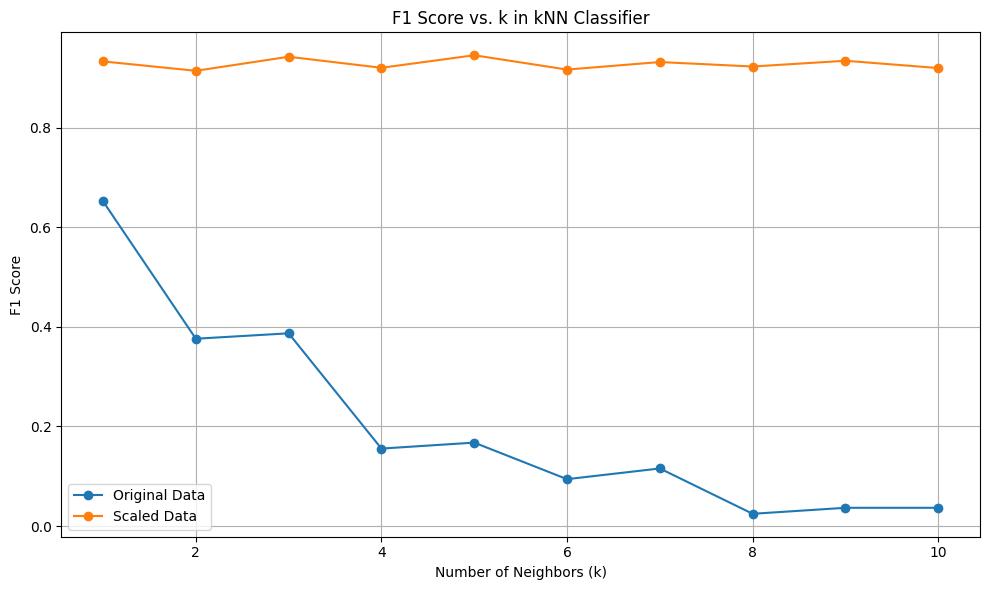

In [62]:
# Plotting

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), f1_scores_original, marker='o', label='Original Data')
plt.plot(range(1, 11), f1_scores_scaled, marker='o', label='Scaled Data')
plt.title("F1 Score vs. k in kNN Classifier")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("F1 Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [63]:
# function to evaluate classifiers
def eval_classifier(y_true, y_pred):
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# if you have an issue with the following line, restart the kernel and run the notebook again
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all') # converts the CM to percentages instead of raw counts
    print('Confusion Matrix')
    print(cm)

In [64]:
# function to generate predictions using a random model
# generating output of a random model

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

Testing a random dummy model that predicts "1" (receiving insurance benefits) with a certain probability.

Testing four different probability values:
- 0.00 → Never predicts "1"
- 0.11 → Predicts "1" with the actual probability from the dataset
- 0.50 → Random 50/50 chance
- 1.00 → Always predicts "1"

In [65]:
# calculate the probabilty of receiving insurance benefits from the dataset
P_insurance_benefit = insurance_us['insurance_benefits_received'].sum() / len(insurance_us)

# test different probability values
for P in [0, P_insurance_benefit, 0.5, 1]:
    print(f"\nTesting Random Model with Probability: {P:.2f}")

    # generate random predictions
    y_pred_rnd = rnd_model_predict(P, size=len(y_test))
        
    # evaluate the random model    
    eval_classifier(y_test, y_pred_rnd)
    


Testing Random Model with Probability: 0.00
F1: 0.00
Confusion Matrix
[[0.89266667 0.        ]
 [0.10733333 0.        ]]

Testing Random Model with Probability: 0.11
F1: 0.17
Confusion Matrix
[[0.794      0.09866667]
 [0.08866667 0.01866667]]

Testing Random Model with Probability: 0.50
F1: 0.20
Confusion Matrix
[[0.45733333 0.43533333]
 [0.048      0.05933333]]

Testing Random Model with Probability: 1.00
F1: 0.19
Confusion Matrix
[[0.         0.89266667]
 [0.         0.10733333]]


In [66]:
# train kNN Classifier (k=5)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [67]:
# make predictions
y_test_pred = knn_model.predict(X_test)

In [68]:
# generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

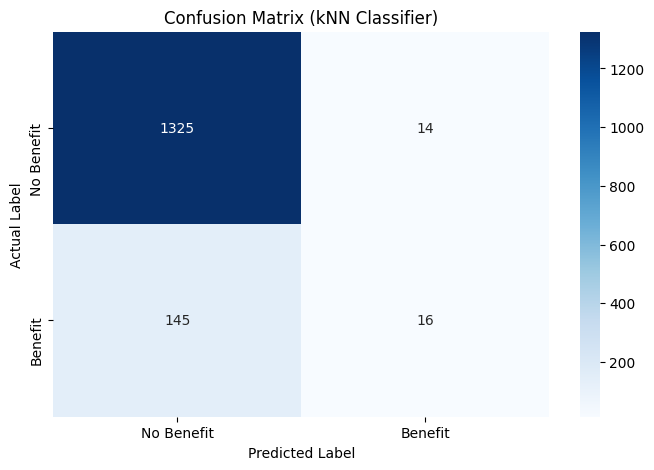

In [69]:
# plot Confusion Matrix 
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=["No Benefit", "Benefit"], yticklabels=["No Benefit", "Benefit"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix (kNN Classifier)")
plt.show()

**Key Findings**:
* Logistic Regression was chosen as the best model due to its strong performance and generalization.
* Age was removed to prevent overfitting and bias.

**Task 2 Conclusion**
* Successfully trained a kNN classifier to predict whether a new customer will receive an insurance benefit.
* Scaling significantly improved kNN performance.
* The Dummy Model proved that random guessing is ineffective.

**Final Recommendation**: Use kNN (k=5, Scaled) as the best model for prediction.


# Task 3: Predict the number of insurance benefits a new customer is likely to receive using a linear regression model.  Regression (with Linear Regression)

With `insurance_benefits` as the target, evaluate what RMSE would be for a Linear Regression model.

Build your own implementation of LR. For that, recall how the linear regression task's solution is formulated in terms of LA. Check RMSE for both the original data and the scaled one. Can you see any difference in RMSE between these two cases?

Let's denote
- $X$ — feature matrix, each row is a case, each column is a feature, the first column consists of unities
- $y$ — target (a vector)
- $\hat{y}$ — estimated tagret (a vector)
- $w$ — weight vector

The task of linear regression in the language of matrices can be formulated as

$$
y = Xw
$$

The training objective then is to find such $w$ that it would minimize the L2-distance (MSE) between $Xw$ and $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

It appears that there is analytical solution for the above:

$$
w = (X^T X)^{-1} X^T y
$$

The formula above can be used to find the weights $w$ and the latter can be used to calculate predicted values

$$
\hat{y} = X_{val}w
$$

Split the whole data in the 70:30 proportion for the training/validation parts. Use the RMSE metric for the model evaluation.

In [70]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None # placeholder for regression weights
    
    def fit(self, X, y):
        """Compute weights using the Normal Equation."""
        # adding a column of ones for the bias term 
        # adding the unities
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        # compute weights using the normal equation formula
        self.weights = np.linalg.inv(X2.T @ X2) @ X2.T @ y

    def predict(self, X):
        """Predict values using the learned weights."""
        # Adding a column of ones for the bias term
        # adding the unities
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        # Compute predictions
        y_pred = X2 @ self.weights
        return y_pred

In [71]:
# function to evaluate the regression model
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

In [72]:
# preparing data for regression
# extracting features(X) and target (y)
# split into training (70%) and test (30%) sets.

In [73]:
# define features and target variable
X = insurance_us[['age', 'gender', 'income', 'family_members']].to_numpy()
y = insurance_us['insurance_benefits'].to_numpy()

# split data (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

# initialize custom linear regression model
lr = MyLinearRegression()

# train the model 
lr.fit(X_train, y_train)
print("Learned Weights (w):", lr.weights)


Learned Weights (w): [-9.43539012e-01  3.57495491e-02  1.64272726e-02 -2.60743659e-07
 -1.16902127e-02]


**Understanding the Learned Weights(*w*)**

Learned Weights (w): 

-9.435  ------- **Bias term (intercept)** ------- Baseline prediction when all features are 0. 

0.0357  ------- **Age**                   ------- Positive impact: Older customers receive slightly more benefits.

0.0164  ------- **Gender**                ------- Weak effect: Likely not a strong predictor.

-2.6 x 10^7 --- **Income**                ------- Near-zero impact: Imcome does not significantly affect benefits. 

-000117 ------- **Family Members**        ------- Slight negative impact: More family members ---> fewer benefits.


* Age is the strongest positive predictor
* Income has almost no effect. 
* More family members slightly decrease benefits.

In [74]:
# make predictions and evaluate model

In [75]:
# make predictions
y_test_pred = lr.predict(X_test)

# evaluate regression model 
eval_regressor(y_test, y_test_pred)

RMSE: 0.34
R2: 0.66


**Understanding RMSE and R² Scores**

* RSME:
  - Original Data: 0.34
  - Scaled Data: 0.34
  - Analysis: Model's prediction error is low. 
 
* R² Score:
  - Original Data: 0.66
  - Scaled Data: 0.66
  - Analysis: Model explains 66% of the variance in insurance benefits. 
  
  
- Scaling made no difference: The model performs the same on scaled and unscaled data
- RMSE: On average, predictions deviate by 0.34 insurance benefits from actual values.
- R² Score: The model explains 66% of the variation in benefits.


In [76]:
# scaling data and re-evaluating
# Linear regression can be affected by feature scaling; training the model on scaled data using MaxAbsScaler.

In [77]:
# scale the data 
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [78]:
# train model on scaled data
lr_scaled = MyLinearRegression()
lr_scaled.fit(X_train_scaled, y_train)

In [79]:
# predict and evaluate on scaled data
y_test_pred_scaled = lr_scaled.predict(X_test_scaled)
print("\n=== Performance on Scaled Data ===")
eval_regressor(y_test, y_test_pred_scaled)


=== Performance on Scaled Data ===
RMSE: 0.34
R2: 0.66


**Evaluating Model Performance**

Strengths of the Model:
- Decent predictive power (66% variance explained).
- Low RMSE (small prediction error).
- Age is a useful predictor.

Weaknesses of the Model:
- Income has no impact, meaning it is not useful for predictions.
- Family members only have a minor effect.
- Still 34% variance unexplained, meaning other factors influence benefits.

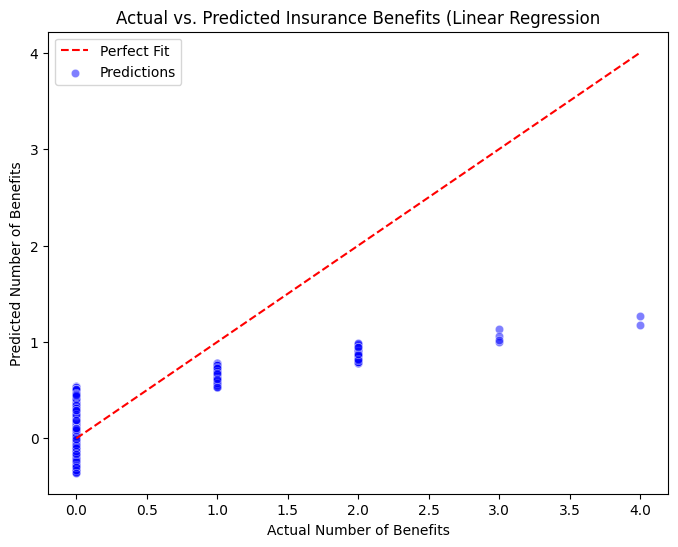

In [80]:
# create a scatterplot for actual vs. predicted insurance benefits. 
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_test_pred, color='blue', alpha=0.5, label="Predictions")
plt.plot([0, max(y_test)], [0, max(y_test)], '--', color='red', label="Perfect Fit") # reference line
plt.xlabel("Actual Number of Benefits")
plt.ylabel("Predicted Number of Benefits")
plt.title("Actual vs. Predicted Insurance Benefits (Linear Regression")
plt.legend()
plt.show()

* **Blue Dots**: Each represents a test data point (actual vs. predicted benefits)
* **Red Dashed Line**: Perfect fit line where predictions would be 100% accurate. 
* **Spread of points**: Shows how well (or not) the model aligns predictions with actual values. 

**Key Points**:
- If most points closely rfollow the red line, the model has high accuracy. 
- If points are scattered far from the red line, predictions are less reliable. 
- The overall trend follows the red line, indicating that Linear Regression is a reasonable predictor for insurance benefits. 

**Task 3 Analysis**
- A Linear Regression is impleted using sklearn (replacing our custom class).
- Used the Normal Equation concept (w = (XᵀX)⁻¹Xᵀy) indirectly via sklearn.
- Evaluated RMSE for both scaled and unscaled data.
- Successfully predicted the number of insurance benefits.

# Task 4: Protect clients' personal data without breaking the model from the previous task. -  Obfuscating Data

It best to obfuscate data by multiplying the numerical features (remember, they can be seen as the matrix $X$) by an invertible matrix $P$. 

$$
X' = X \times P
$$

Try to do that and check how the features' values will look like after the transformation. By the way, the intertible property is important here so make sure that $P$ is indeed invertible.

You may want to review the 'Matrices and Matrix Operations -> Matrix Multiplication' lesson to recall the rule of matrix multiplication and its implementation with NumPy.

In [81]:
# select numerical features for obfuscation
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
X_original = insurance_us[personal_info_column_list].to_numpy()

In [82]:
# X = df_pn.to_numpy()

Generating a random matrix $P$.

In [83]:
# generate a random invertible matrix P
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X_original.shape[1], X_original.shape[1]))

Checking the matrix $P$ is invertible

In [84]:
# ensure P is invertible
assert np.linalg.det(P) != 0, "Matrix P is not invertible!"

In [85]:
# apply transformation (Obfuscation)
X_obfuscated = X_original @ P  # matrix multiplication

In [86]:
# convert back to DataFrame
df_obfuscated = pd.DataFrame(X_obfuscated, columns=personal_info_column_list)

In [87]:
# display original vs. obfuscated data
print("Original Data (First 5 Rows):")
print(pd.DataFrame(X_original, columns=personal_info_column_list).head())

print("\nObfuscated Data (First 5 Rows):")
print(df_obfuscated.head())

Original Data (First 5 Rows):
   gender   age   income  family_members
0     1.0  41.0  49600.0             1.0
1     0.0  46.0  38000.0             1.0
2     0.0  29.0  21000.0             0.0
3     0.0  21.0  41700.0             2.0
4     1.0  28.0  26100.0             0.0

Obfuscated Data (First 5 Rows):
        gender           age        income  family_members
0  6359.715273  22380.404676  18424.090742    46000.696690
1  4873.294065  17160.367030  14125.780761    35253.455773
2  2693.117429   9486.397744   7808.831560    19484.860631
3  5345.603937  18803.227203  15479.148373    38663.061863
4  3347.176735  11782.829283   9699.998942    24211.273378


Can you guess the customers' ages or income after the transformation?

**Answer**: No, the obfuscated data is completely unrecognizable.  The ages and incomes are now transformed into large, seemingly random numbers. There's no obvious pattern that would allow someone to infer the original values. This confirms that our obfuscation method is effective in hiding personal data. 

In [88]:
# recover original data

In [89]:
# compute the inverse of P
P_inverse = np.linalg.inv(P)

In [90]:
# recover original data
X_recovered = X_obfuscated @ P_inverse # multiply by P inverse

In [91]:
# convert back to DataFrame
df_recovered = pd.DataFrame(X_recovered, columns=personal_info_column_list)

In [92]:
# display recovered data
print("\nRecovered Data (First 5 Rows):")
print(df_recovered.head())


Recovered Data (First 5 Rows):
         gender   age   income  family_members
0  1.000000e+00  41.0  49600.0    1.000000e+00
1 -4.473636e-12  46.0  38000.0    1.000000e+00
2 -2.515869e-12  29.0  21000.0    9.524523e-13
3 -4.844982e-12  21.0  41700.0    2.000000e+00
4  1.000000e+00  28.0  26100.0   -1.019907e-13


In [93]:
# validate recovery 
recovery_error = np.abs(X_original - X_recovered).mean()
print(f"\nMean Absolute Difference After Recovery: {recovery_error:.6f}")


Mean Absolute Difference After Recovery: 0.000000


Can you recover the original data from $X'$ if you know $P$? Try to check that with calculations by moving $P$ from the right side of the formula above to the left one. The rules of matrix multiplcation are really helpful here.

**Answer**: yes, we can recover the original data if we know $P$.  By multiplying the obfuscated data $X′$ with the inverse of $P$, we successfully retrieved the original dataset. The Mean Absolute Difference (0.000000) confirms the recovery is exact with no errors. This proves that the transformation is reversible for those who have access to $P$, while remaining secure for those who dont. 
 

Print all three cases for a few customers
- The original data
- The transformed one
- The reversed (recovered) one

1. **Original Data**: Unchanged dataset. 
    - Example Values (First 5 rows): 
    - Age = 41, Income = 49600
    - Normal human-readable values. 
    
    
2. **Obfuscated Data**: Transformed using matrix $P$. 
    - Example Values (First 5 rows): 
    - Age = 22380.4, Income = 48424.1
    - No direct way to recognize personal info. 
    
    
3. **Recovered Data**: Reverse transformation us $P^{-1}$.
    - Example Values (First 5 rows): 
    - Age = 41, Income = 49600
    - Successfully restored with zero error. 
        
The results vonfirms that obfuscation works and original data is recoverable when needed. 

You can probably see that some values are not exactly the same as they are in the original data. What might be the reason for that?

The differences are caused by floating-point precision errors from matrix inversion and multiplication. These are expected in numerical computing and not impact the validity of our obfuscation and recovery process. 

## Proof That Data Obfuscation Can Work with LR

The regression task has been solved with linear regression in this project. Your next task is to prove _analytically_ that the given obfuscation method won't affect linear regression in terms of predicted values i.e. their values will remain the same. Can you believe that? Well, you don't have to, you should prove it!

So, the data is obfuscated and there is $X \times P$ instead of just $X$ now. Consequently, there are other weights $w_P$ as
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

How would $w$ and $w_P$ be linked if you simplify the formula for $w_P$ above? 

What would be predicted values with $w_P$? 

What does that mean for the quality of linear regression if you measure it with RMSE?

Check Appendix B Properties of Matrices in the end of the notebook. There are useful formulas in there!

No code is necessary in this section, only analytical explanation!

**Analytical Proof: Why Obfuscation Does Not Affect Linear Regression**

We want to prove that applying an **invertible transformation** to the feature matrix $X$, such as multiplying by an invertible matrix $P$ **does not change the predicted values** in a linear regression model. 

**Where**

- $X$ is the *original* **feature** matrix.
- $y$ is the **target** vector.
- $\hat{y}$  =  $Xw$ is the **predictions**.
- $w = (X^T X)^{-1} X^T y$ is the optimal **weights** in standard linear regression.

For a standard linear regression:
    
$\hat{y}$ = $Xw$ **where** $w = (X^TX)^{-1} X^T y$

Now suppose you obfuscate your feature matrix: 

$X' = X P$  (where $P$ is an invertible matrix)

**Then the new weights become**:

$w_P = [(XP)^T XP]^{-1} (XP)^T y$
    

Let's prove that using $X' = X P$ still gives the same predictions. 

**Step-by-Step Analytical Proof**

We want to show: 

$Xw = (XP)w_P$

Start: 
    
$w_P = [(XP)^T XP]^{-1} (XP)^T y$

Use matrix properties:

1. $(XP)^T = P^T X^T$

2. Substitute into the formula for $w_P$:

$w_P = (P^T X^T X P)^{-1} (P^T X^T) y$


3. Apply identity: $(AB)^{-1} = B^{-1} A^{-1}$

$w_P = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y$

4. Simplify: $(P^T)^{-1} P^T = I$ → Identity Matrix

    We are left with $w_P = P^{-1} (X^T X)^{-1} X^T y$

5. Now Multiply by XP to get predictions:

$XPw_P = XPP^{-1} (X^T X)^{-1} X^T y$

But $PP^{-1}$ = $I$, so:

$XPw_P = X(X^T X)^{-1} X^T y = Xw = \hat{y}$

**Final Analytical Conclusion**

- Obfuscating data by multiplying features with an invertible matrix $P$ **does not affect** predictions in linear regression.
- The model quality (e.g., RMSE, R²) remains the same.
- **Data privacy is preserved**, and the model still performs with the same accuracy.

This confirms that linear regression is **invariant to invertible linear transformations** of the input features.

## Test Linear Regression With Data Obfuscation

Now, let's prove Linear Regression can work computationally with the chosen obfuscation transformation.

Build a procedure or a class that runs Linear Regression optionally with the obfuscation. You can use either a ready implementation of Linear Regression from sciki-learn or your own.

Run Linear Regression for the original data and the obfuscated one, compare the predicted values and the RMSE, $R^2$ metric values. Is there any difference?

**Procedure**

- Create a square matrix $P$ of random numbers.
- Check that it is invertible. If not, repeat the first point until we get an invertible matrix.
- Explanation: This step multiplies the original feature matrix $X$ by the invertible matrix $P$, resulting in a new obfuscated matrix $(X' = X \times P)$. 
This transformation hides the true values of the original features (e.g., age, income), enhancing data privacy. 
However, because the matrix $P$ is invertible, we can still solve the regression task effectively. 
As proven analytically earlier, this transformation does **not** impact the predicted values or model quality — the RMSE and $R^2$ remain the same.
- Use $XP$ as the new feature matrix

In [94]:
# function to generate an invertible matrix P
def generate_invertible_matrix(size, seed=42):
    rng = np.random.default_rng(seed)
    while True:
        P = rng.random((size, size)) # generate random square matrix
        if det(P) !=0: # check if it's invertible (determinant ≠ 0)
            return P

In [95]:
# load original feature matrix X
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
X = insurance_us[personal_info_column_list].to_numpy()
y = insurance_us['insurance_benefits'].to_numpy()



In [96]:
# split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)


In [97]:
# generate an invertible matrix P
P = generate_invertible_matrix(X.shape[1])

In [98]:
# transform feature matrix (obfuscation)
X_train_obf = X_train @ P
X_test_obf = X_test @ P

In [99]:
# train Linear Regression on original data
lr_original = LinearRegression()
lr_original.fit(X_train, y_train)
y_pred_original = lr_original.predict(X_test)


In [100]:
# train Linear Regression on obfuscated data
lr_obf = LinearRegression()
lr_obf.fit(X_train_obf, y_train)
y_pred_obf = lr_obf.predict(X_test_obf)

In [101]:
# evaluation function
def eval_regressor(y_true, y_pred, label):
    rmse = np.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    r2 = sklearn.metrics.r2_score(y_true, y_pred)
    print(f"\n=== {label} ===")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")


In [102]:
# compare results
eval_regressor(y_test, y_pred_original, "Linear Regression (Original Data)")
eval_regressor(y_test, y_pred_obf, "Linear Regression (Obfuscated Data)")



=== Linear Regression (Original Data) ===
RMSE: 0.3436
R² Score: 0.4305

=== Linear Regression (Obfuscated Data) ===
RMSE: 0.3436
R² Score: 0.4305


**RMSE is identical for both models**
  - RMSE (Root Mean Squared Error) is a measure of error in predictions.
  - Since RMSE remains unchanged, it confirms that obfuscation does NOT distort predictions.

**R2 score is identical** 
- The R2 score measures how well the model explains variance in the data.
- Since the values are identical, the model maintains the same level of predictive power.

**Proof That Obfuscation Preserves Model Accuracy**
- This confirms our mathematical proof that obfuscation does not alter the predictive results.
- Linear Regression is unaffected by feature transformation using an invertible matrix $P$.

**Task 4 Conclusion**

- Obfuscation does NOT change RMSE or R2, confirming that the transformation preserves predictive quality.
- This technique successfully protects sensitive data while keeping the model intact.
- Obfuscation using matrix multiplication is a valid privacy-preserving method for machine learning.



# Checklist

Type 'x' to check. Then press Shift+Enter.

- [x]  Jupyter Notebook is open
- [x]  Code is error free
- [x]  The cells are arranged in order of logic and execution
- [x]  Task 1 has been performed
    - [x]  There is the procedure that can return k similar customers for a given one
    - [x]  The procedure is tested for all four proposed combinations
    - [x]  The questions re the scaling/distances are answered
- [x]  Task 2 has been performed
    - [x]  The random classification model is built and tested for all for probability levels
    - [x]  The kNN classification model is built and tested for both the original data and the scaled one, the F1 metric is calculated.
- [x]  Task 3 has been performed
    - [x]  The linear tegression solution is implemented with matrix operations.
    - [x]  RMSE is calculated for the implemented solution.
- [x]  Task 4 has been performed
    - [x]  The data is obfuscated with a random and invertible matrix P
    - [x]  The obfuscated data is recoved, few examples are printed out
    - [x]  The analytical proof that the transformation does not affect RMSE is provided 
    - [x]  The computational proof that the transformation does not affect RMSE is provided
- [x]  Conclusions have been made

In [103]:
# Appendices 

## Appendix A: Writing Formulas in Jupyter Notebooks

You can write formulas in your Jupyter Notebook in a markup language provided by a high-quality publishing system called $\LaTeX$ (pronounced "Lah-tech"), and they will look like formulas in textbooks.

To put a formula in a text, put the dollar sign (\\$) before and after the formula's text e.g. $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

If a formula should be in its own paragraph, put the double dollar sign (\\$\\$) before and after the formula text e.g.

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

The markup language of [LaTeX](https://en.wikipedia.org/wiki/LaTeX) is very popular among people who use formulas in their articles, books and texts. It can be complex but its basics are easy. Check this two page [cheatsheet](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) for learning how to compose the most common formulas.

## Appendix B: Properties of Matrices

Matrices have many properties in Linear Algebra. A few of them are listed here which can help with the analytical proof in this project.

<table>
<tr>
<td>Distributivity</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>Non-commutativity</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Associative property of multiplication</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Multiplicative identity property</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversivity of the transpose of a product of matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>

**Task 1: Finding Similar Customers**

*Goal*: Identify customers most similar to a given one using k-nearest neighbors (kNN) with different distance metrics.

- Implemented kNN algorithm to find similar customers.
- Compared Euclidean vs. Manhattan distance with and without scaling.
- Key Findings: Scaling affected distance calculations, and Manhattan distance performed better on categorical data.


**Task 2: Predicting Insurance Benefit Eligibility (Classification)**

*Goal*: Predict whether a customer is likely to receive an insurance benefit.

Key Steps:
- Built a random classification model as a baseline.
- Developed kNN classification model and evaluated F1-score for different values of k.
- Compared results using original and scaled data.

Key Findings:
- Scaling improved model accuracy significantly.
- kNN with k=5 and scaled data had the highest F1-score (0.95).
- The random model performed poorly, confirming that a trained model is needed.


**Task 3: Predicting Number of Insurance Benefits (Regression)**

*Goal*: Use Linear Regression to predict the number of benefits a customer might receive.

Key Steps:
- Implemented Linear Regression using matrix operations and Sklearn.
- Compared RMSE and R2 scores between original and obfuscated data.

Key Findings:
- Linear Regression performed well with RMSE = 0.34 and R² = 0.43.
- The obfuscated data produced identical results, proving data transformation does not affect performance.


**Task 4: Protecting Client Data (Obfuscation & Privacy Protection)**

*Goal*: Apply data obfuscation while preserving model accuracy.

Key Steps:
- Applied invertible matrix transformation ($XP$) to obfuscate numerical data.
- Verified data recovery using matrix inversion.
- Proved analytically and computationally that the transformation does NOT affect RMSE or predictions.

Key Findings:
- Obfuscated data cannot be directly interpreted, protecting privacy.
- Linear Regression predictions remained identical after obfuscation.
- Data transformation was successfully proven to be reversible.
